<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/ProyectoFinal/ProyectoFinal_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final Machine Learning**

# **Clasificacion de Imagenes**: Piedra, Papel o Tijeras

Universidad de Guanajuato, Division de Ciencias e Ingenierias

Mtra. Alma Xochitl

Alumno. Diego Paniagua Molina



--------------------------------------------------------------------------------



# Tabla de Contenidos

1. [Introducción](#intro)
2. [Marco Teorico](#marco)

>2.1 [Clasificacion de Imagenes](#clas)

>2.2 [Arqitectura de una CNN](#arqui)

>2.3 [Operacion Convolucin](#conv)

>2.4 [Funciones de Activacion](#funcion)

>2.5 [Capas de una CNN](#capas)

3. [Metodologia](#metodologia)

>3.1 [Definicion del Problema](#problema)

>3.2 [Conjunto de Datos](#datos)

>3.3 [Procesamiento de Datos](#procesamiento)

>3.4 [Diseño de la Red Neuronal](#red)

>3.5 [Eleccion de Hiperparametros](#hiperparametros)

>3.6 [Entrenamiento del Modelo](#entrenamiento)

>3.7 [Evaluacion del Modelo](#evaluacion)

4. [Resultados](#resultados)  
5. [Conclusiones](#conclusiones)
6. [Referencias](#referencias)










---



# Introducción <a name="intro"></a>








El **Machine Learning** o aprendizaje automático posibilita la identificación de patrones en los datos basándose en algoritmos que clasifican cada factor según su grado de influencia aprendiendo y mejorando el proceso continuamente. [1]

Las **redes neuronales**, en particular las **redes neuronales convolucionales** (*CNN*), han demostrado ser instrumentos valiosos para realizar tareas de **clasificación** o **regresión** a partir de datos de entrada, especialmente en el ámbito del **procesamiento de imágenes**. Este enfoque encuentra aplicaciones significativas, por ejemplo, en la identificación de objetos en una imagen, la clasificación de su contenido, o la realización de tareas más avanzadas como la segmentación y detección.

Las CNN han revolucionado el campo del reconocimiento de imágenes al introducir un enfoque de procesamiento localizado y eficiente. A diferencia de las redes neuronales convencionales y otros algoritmos de clasificación de imágenes, las CNN utilizan **filtros** que operan en regiones específicas de la imagen, permitiendo la identificación de patrones locales de manera más efectiva.

El proceso de entrenamiento de una CNN implica el uso de imágenes como entrada, representadas mediante píxeles, junto con sus respectivas etiquetas. Durante el aprendizaje, la red utiliza filtros para analizar y aplicar convoluciones a las imágenes. Cada filtro busca patrones específicos en pequeñas regiones, o ventanas, de la imagen, permitiendo que la CNN identifique características relevantes.

En términos técnicos, las CNN toman **tensores** de forma que incluyen la altura y el ancho de la imagen en píxeles, así como el número de canales de color (1 para imágenes en blanco y negro o 3 para imágenes en color RGB). La salida de la red proporciona la clase a la que pertenece la imagen o la probabilidad asociada a esa clasificación.

Este enfoque ha demostrado ser altamente eficaz en una variedad de aplicaciones de visión por computadora y ha contribuido significativamente al progreso en el campo del reconocimiento de patrones en imágenes.




A continuacion se muestra un ejemplo grafico de la arquitectura de una CNN:

![Error](https://drive.google.com/uc?id=1b6ZLN30hunm1EOK5-jRK3rydAEdC0rhd)

Imagen: https://nafizshahriar.medium.com/what-is-convolutional-neural-network-cnn-deep-learning-b3921bdd82d5 [2].



El objetivo de este proyecto es analizar un conjunto de imagenes del famoso juego piedra, papel o tijeras mediante el uso de las CNN para realizar la tarea de clasificar dichas imagenes.


# Marco Teorico <a name="marco"></a>






## Clasificacion de Imagenes <a name="clas"></a>



Las CNN tienen multiples aplicaciones, en este proyecto se estara estudiando especificamente la **clasificacion de imagenes**.  

* *Clasificación de imágenes*: es la tarea de asignar una etiqueta de clase a una imagen de entrada. Las CNN pueden entrenarse en grandes conjuntos de datos de imágenes etiquetadas para aprender las relaciones entre los píxeles de la imagen y las etiquetas de clase, y luego aplicarse a imágenes nuevas para hacer una predicción.

## Arquitectura de una CNN <a name="arqui"></a>

La **arquitectura** de una red neuronal para la clasificación de imágenes implica la organización de capas diseñadas para aprender y reconocer patrones visuales en datos de imágenes.

Generalmente, incluye capas convolucionales para la extracción de características, capas de pooling para reducir la dimensionalidad, una capa de aplanamiento y capas densas para la clasificación. La última capa suele tener activación softmax para la salida de probabilidades de las clases. Los detalles específicos, como el número de capas, filtros y neuronas, así como las funciones de activación, se ajustan según la complejidad del problema y la naturaleza de los datos de imágenes, mas adelante se hablara mas a fondo al respecto de estas caraceteristicas.

## Operacion Convolucion <a name="conv"></a>

La **convolución** es una operación matemática sencilla que se suele utilizar para el tratamiento y el reconocimiento de imágenes. En una imagen, su efecto se asimila a un filtrado, a continuacion podemos ver su funcionamiento [5].


![Error](https://drive.google.com/uc?id=1Lmrl_ZaW0DnnS51NQT-9ssmqGQkEu4X6)


1. En primer lugar, se define el tamaño de la ventana de filtro situada en la parte superior izquierda.

2. La ventana de filtro, que representa la característica, se desplaza progresivamente de izquierda a derecha un determinado número de casillas definido previamente (el paso) hasta llegar al final de la imagen.

3. En cada porción de imagen que encuentra, se efectúa el cálculo de convolución permitiendo obtener en la salida una tarjeta de activación o "feature map" que indica dónde están localizadas las "features" en la imagen: cuanto más arriba esté la "feature", más se parecerá a ella la porción de imagen barrida.

## Funciones de Activacion <a name="funcion"></a>



La **función de activación** se encarga de devolver una salida a partir de un valor de entrada, normalmente el conjunto de valores de salida en un rango determinado como (0,1) o (-1,1).

Se buscan funciones en las cuales sus derivadas sean simples, para minimizar con ello el coste computacional [6].

Las dos funciones de activacion utilizadas en este proyecto se definen a continuacion:

1.   **ReLU - Rectified Lineal Unit**. La función ReLU transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran, esta funcion tiene la siguiente forma:

   $f(x) = \max(0, x)$


2.   **Softmax**. La función Softmax transforma las salidas a una representación en forma de probabilidades, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1, esta funcion tiene la siguiente forma:

   $f(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $


## Capas de una CNN <a name="capas"></a>



Para realizar la tarea especifica de "*clasificacion de imagenes*" se hara uso de multiples **capas** de distintos tipos en la CNN. Las **capas** en una CNN desempeñan roles específicos en el procesamiento de información.

1. *Capa de entrada*: representa la entrada de datos a la red y su función es definir las dimensiones de la entrada, como el tamaño de la imagen y el número de canales de color (en caso de haber mas de uno).

2. *Capa convolucional*: son las encargadas de aplicar la convolución a nuestras imágenes de entrada para encontrar los patrones que más tarde permitirán clasificarla [4].

3. *Capa de pooling*: se utilizan para ir reduciendo el tamaño de nuestros mapas de activaciones, ya que de otra forma no sería posible ejecutarlos en GPUs. Además, también ayuda a reducir el "overfitting" [4].

4. *Capa de aplanamiento*: transforma la salida tridimensional de las capas anteriores en un vector unidimensional y prepara los datos para la entrada a capas densas.

5. *Capa Densa*: realiza operaciones densas (totalmente conectadas) en los datos aplanados, se conocen como "las de siempre", debido a que son las más básicas y utilizadas [4].

6. *Capa de Salida*: Produce la salida final de la red.

# Metodologia <a name="metodologia"></a>




## Definicion del Problema <a name="problema"></a>


Este proyecto consiste ejemplicar la tarea de **clasificación de imágenes** para tres clases distintas (piedra, papel o tijeras). Se busca desarrollar un modelo de aprendizaje, una CNN, capaz de asignar de manera precisa y eficiente cada imagen de entrada a una de las tres categorías predefinidas. La clasificación se fundamenta en la capacidad del modelo para aprender patrones y características distintivas presentes en las imágenes que caracterizan cada clase. El objetivo es lograr una generalización efectiva a partir de un conjunto de datos de entrenamiento, de manera que el modelo pueda realizar predicciones precisas en imágenes no vistas previamente. La correcta clasificación de estas imágenes se considera esencial para el éxito del modelo y, por ende, para la resolución del problema planteado.

## Conjunto de Datos <a name="datos"></a>




Los datos utilizados provienen de https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors [3]. Este conjunto de datos contiene imágenes de gestos con las manos del juego piedra, papel y tijera.

In [ ]:
# Instalamos Kaggle para cargar el conjunto de datos en Google Colab.

!pip install -q kaggle

In [ ]:
# Cargamos nuestra clave API de Kaggle.

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diegopaniaguamolina","key":"2fc93b31e45aced11c3967cd95f51964"}'}

In [ ]:
# Las líneas siguientes crean un directorio '.kaggle' en el directorio de inicio del usuario,
# copian el archivo de la clave API cargada en el paso anterior en ese directorio,
# y luego establecen permisos restrictivos para garantizar la seguridad de la clave.

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargamos el dataset desde Kaggle.

! kaggle datasets download -d 'drgfreeman/rockpaperscissors'

 97% 296M/306M [00:02<00:00, 139MB/s]
100% 306M/306M [00:02<00:00, 140MB/s]


In [ ]:
# Verificamos el archivo presente en el directorio actual.

!ls

kaggle.json  rockpaperscissors.zip  sample_data


In [ ]:
# Descomprimimos el dataset .zip

!unzip -q rockpaperscissors.zip

In [ ]:
# Ahora tenemos las carpetas que se encontraban dentro del archivo .zip desplegadas.

!ls

kaggle.json  README_rpc-cv-images.txt  rockpaperscissors.zip  sample_data
paper	     rock		       rps-cv-images	      scissors


## Procesamiento de Datos <a name="procesamiento"></a>




In [ ]:
# Importamos las librerias necesarias.

import zipfile,os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras import optimizers
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Verificamos la version de TensorFlow

print(tf.__version__)

2.14.0


In [ ]:
# Mediante la libreria 'os' usamos la funcion 'os.listdir' la cual
# nos devuelve una lista de nombres de archivos en el directorio actual.

os.listdir()

['.config',
 'scissors',
 'rockpaperscissors.zip',
 'rock',
 'rps-cv-images',
 'paper',
 'README_rpc-cv-images.txt',
 'kaggle.json',
 'sample_data']

In [ ]:
# Elegimos el archivo particular que queremos explorar.

os.listdir('rps-cv-images')

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [ ]:
# Definimos las carpetas que contienen las imágenes para cada categoría.

rps_image = 'rps-cv-images'
piedra_im = 'rock'
papel_im = 'paper'
tijeras_im = 'scissors'

# Listamos los archivos en cada una de las carpetas correspondientes a las categorías de "rock", "paper" y "scissors".

piedra_data = os.listdir(os.path.join(rps_image, piedra_im))
papel_data = os.listdir(os.path.join(rps_image, papel_im))
tijeras_data = os.listdir(os.path.join(rps_image, tijeras_im))

# Imprimimos el número de imágenes en cada categoría.

print('Numero de imagenes de Piedra:', len(piedra_data))
print('Numero de imagenes de Papel:', len(papel_data))
print('Numero de imagenes de Tijeras:', len(tijeras_data))

Numero de imagenes de Piedra: 726
Numero de imagenes de Papel: 712
Numero de imagenes de Tijeras: 750


Ahora, para el procesamiento de datos se generan lotes de datos aumentados durante el entrenamiento de nuestro modelo utilizando la clase ImageDataGenerator de TensorFlow/Keras. Es importante realizar esto ya que tiene varios propósitos y beneficios tales como:

* **Aumentar la Variabilidad del Conjunto de Datos**: Introduce variaciones en las imágenes originales mediante transformaciones como rotaciones, desplazamientos, zoom, inversiones, etc. Esto ayuda a enriquecer el conjunto de datos y proporciona al modelo más variedad para aprender patrones.

* **Prevención del Sobreajuste**: El sobreajuste ocurre cuando un modelo aprende demasiado bien los detalles específicos de los datos de entrenamiento, pero no generaliza bien a nuevos datos. La aumentación de datos ayuda a prevenir el sobreajuste al presentar variaciones en el conjunto de entrenamiento, lo que permite al modelo aprender patrones más robustos.

* **Mejora de la Generalización**: Al exponer el modelo a diferentes variaciones de los datos, se espera que el modelo generalice mejor a nuevos datos del mundo real que pueden tener ciertas variaciones o perturbaciones.

* **Reducción del Riesgo de Sobreentrenamiento**: El aumento de datos también puede ayudar a reducir el riesgo de sobreentrenamiento, especialmente cuando el tamaño del conjunto de datos es limitado. Esto proporciona al modelo una mayor cantidad de ejemplos "virtuales" para aprender.

* **Mejora de la Robustez del Modelo**: Un modelo entrenado con datos aumentados puede ser más robusto a pequeñas variaciones en las imágenes de entrada, lo que puede ser beneficioso en situaciones del mundo real donde las condiciones pueden variar.

* **Entrenamiento Eficiente**: La generación de datos aumentados en tiempo real permite entrenar modelos con conjuntos de datos más pequeños, ya que cada imagen puede ser transformada de diversas maneras, generando virtualmente nuevos ejemplos de entrenamiento.

* **Mejora del Rendimiento del Modelo**: En muchos casos, la incorporación de aumentación de datos durante el entrenamiento ha demostrado mejorar el rendimiento y la precisión de los modelos de aprendizaje profundo.

En resumen, generar lotes de datos aumentados durante el entrenamiento es una estrategia efectiva para mejorar la capacidad de generalización de un modelo y mitigar problemas como el sobreajuste, especialmente en problemas de visión por computadora donde las variaciones en los datos de entrada son comunes. A continuacion se muestra el proeso para realizar este metodo:

In [ ]:
# Inicializamos el generador de imagenes y dividimos el conjunto de datos en
# conjuntos de entrenamiento y validación, reservando el 40% para validación y
# normalizamos los valores de píxeles de las imágenes para que estén en el rango
# [0, 1]. Dividimos por 255 para llevar los valores a la escala 0-1.

img_generator = ImageDataGenerator(validation_split = 0.4,
                                   rescale = 1./255)

# Ahora el generador de entrenamiento, cargamos las imágenes y las redimensionamos,
# tambien especificamos que se generen lotes de 4 imágenes a la vez durante el
# entrenamiento.

train_generator = img_generator.flow_from_directory(rps_image,
                                                    target_size = (150,150),
                                                    batch_size = 4,
                                                    class_mode = 'categorical',
                                                    subset = 'training')

# Por ultimo, de la misma forma para el generador de validacion.

validation_generator = img_generator.flow_from_directory(rps_image,
                                                         target_size = (150,150),
                                                         batch_size = 4,
                                                         class_mode = 'categorical',
                                                         subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


El mensaje mostrado hace referencia a que hay 1314 imágenes para datos de entrenamiento. Mientras que hay 874 datos de validación con las mismas tres clases que los datos de entrenamiento.

## Diseño de la Red Neuronal <a name="red"></a>



A continuacion se define la arquitectura de la CNN con ayuda de TensorFlow y Keras.

La arquitectura de la red neuronal para abordar el problema de clasificación de tres tipos de imágenes (piedra, papel o tijeras) se basa en consideraciones específicas relacionadas con las características del conjunto de datos que se estan utilizando y con los requisitos expuestos del proyecto. La arquitectura propuesta se describe de la siguiente manera:

In [ ]:
# Arquitectura de la CNN.

arquitectura = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# Mostramos el resumen de las caracteristicas de la arquitectura.

arquitectura.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Se eligio esta arquitectura particular debido a que:

* La **combinación** de capas convolucionales y de Max Pooling permite la extracción de patrones locales y la reducción de la dimensionalidad de las representaciones.

* La estructura de la red sigue una **jerarquía de caracteristicas** que incrementa progresivamente el número de filtros en las capas convolucionales y reduce el tamaño de la representación con capas de Max Pooling. Esto facilita la captura de características locales y la combinación de información en niveles más altos.

* Para **evitar sobreajuste** se incorporan capas de Max Pooling y Dropout para mitigar el riesgo de sobreajuste. Estas capas reducen la complejidad del modelo y proporcionan regularización durante el entrenamiento.

* **Número de Clases**. La última capa densa tiene 3 neuronas con activación softmax, indicando que el modelo está diseñado para clasificar imágenes en tres clases, alineándose con la naturaleza de la tarea.

* **Capacidad de Aprendizaje**. La arquitectura posee suficientes parámetros para aprender patrones complejos en datos de imágenes. Las capas densas al final permiten la combinación no lineal de características aprendidas.

* **Capacidad Computacional**. La complejidad computacional de la arquitectura es manejable y se ajusta a los recursos disponibles para el entrenamiento del modelo.

* **Experiencia Empírica**. La elección se basa en experimentos anteriores realizados por multiples personas y ajustes realizados en arquitecturas similares, demostrando eficacia en tareas de clasificación de imágenes que se pueden encontrar en internet.

Esquematicamente la arquitectura tendria la siguiente forma:

![Error](https://drive.google.com/uc?id=1D02xnG0DtlQkBaheDwbSBmn9lwqgOQNb)



Analizando de forma detallada capa por capa de nuestra CNN tenemos que:

1. **Capa de Convolución 2D**:
    
    Esta capa tiene 32 filtros de tamaño 3x3, utiliza la función de activación ReLU y espera entradas de la forma (150,150,3).

2. **Capa de Max Pooling 2D**:

    Esta capa reduce la resolución espacial de la representación de la capa anterior tomando el valor máximo en ventanas de 2x2.

3. **Capa de Convolución 2D**:

    Otra capa de convolución con 64 filtros de tamaño 3x3 y activación ReLU.

4. **Capa de Max Pooling 2D**:

    " "

5. **Capa de Convolución 2D**:

    " "

6. **Capa de Max Pooling 2D**:

    " "

7. **Capa de Convolución 2D**:

    " "
8. **Capa de Max Pooling 2D**:

    " "
9. **Capa de Convolución 2D**:

    " "
10. **Capa de Max Pooling 2D**:

    " "

11. **Capa de Aplanamiento** (*Flatten*):

    Esta capa transforma la salida 3D a un vector 1D antes de pasar a la capa densa.

12. **Capa Densa** (*Fully Connected*):

    Capa densa con 512 neuronas y activación ReLU.

13. **Capa de Salida Densa**:

    Por ultimo la capa densa de salida con 3 neuronas y activación softmax, adecuada para un problema de clasificación con 3 clases.

  

## Eleccion de Hiperparametros <a name="hiperparametros"></a>




A continuacion se describen los **hiperparametros** utilizados en la arquitectura de la CNN capa a capa, especificada en la seccion anterior.





1. **Capas Convolucionales:**
   - `tf.keras.layers.Conv2D`:
     - Número de Filtros (`32`, `64`, `128`, `256`, `512`): Determina cuántos filtros se utilizan en cada capa convolucional.
     - Tamaño del Filtro (`(3,3)`): Especifica las dimensiones del filtro convolucional.
     - Función de Activación (`'relu'`): Define la función de activación aplicada después de la convolución.

2. **Capas de Pooling:**
   - `tf.keras.layers.MaxPooling2D`:
     - Tamaño de la Ventana de Pooling (`(2,2)`): Indica el tamaño de la ventana sobre la cual se toma el valor máximo.

3. **Capa de Aplanamiento (Flatten):**
   - `tf.keras.layers.Flatten`: Esta capa aplanadora no tiene hiperparámetros ajustables, ya que simplemente convierte la salida tridimensional de las capas anteriores en un vector unidimensional como se menciono anteriormente.

4. **Capas Densas (Totalmente Conectadas):**
   - `tf.keras.layers.Dense`:
     - Número de Neuronas (`512`): Indica cuántas neuronas tiene cada capa densa.
     - Función de Activación (`'relu'`): Define la función de activación aplicada después de la operación densa.

5. **Capa de Salida:**
   - `tf.keras.layers.Dense`:
     - Número de Neuronas (`3`): Indica la cantidad de clases en la tarea de clasificación.
     - Función de Activación (`'softmax'`): Utilizada para problemas de clasificación multiclase.

Para la seccion de **Entrenamiento del Modelo** (seccion siguiente) tambien se eligieron ciertos hiperparametros importantes, los cuales son los siguientes:


6. **Compilación del Modelo:**
   - `arquitectura.compile`:
     - Función de Pérdida (`'categorical_crossentropy'`): Indica la función de pérdida utilizada para medir la discrepancia entre las predicciones y las etiquetas reales.
     - Optimizador (`'Adam'`): Define el algoritmo de optimización utilizado para ajustar los pesos de la red.
     - Métricas (`['accuracy']`): Indica las métricas utilizadas para evaluar el rendimiento del modelo durante el entrenamiento.

7. **Entrenamiento del Modelo:**
   - `arquitectura.fit`:
     - `train_generator` y `validation_generator`: Los generadores de datos de entrenamiento y validación.
     - `epochs` (`30`): Número de épocas de entrenamiento.
     - `steps_per_epoch` (`30`): Número de pasos por época.

Estos son los principales hiperparámetros utilizados en la arquitectura y entrenamiento del modelo. Es posible ajustar estos valores según las necesidades específicas del problema a resolver para asi experimentar con diferentes configuraciones y optimizar el rendimiento del modelo.


## Entrenamiento del Modelo <a name="entrenamiento"></a>




In [ ]:
# Configuramos la arquitectura para el entrenamiento, considerando los
# hiperparametros mencionados anteriormente.

arquitectura.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# El método .fit() se utiliza para entrenar nuestro modelo.
# La variable 'history' guarda información sobre la evolución
# de la pérdida y las métricas a lo largo del entrenamiento,
# lo que puede ser útil para visualizar y analizar el rendimiento del modelo.

history = arquitectura.fit(
    train_generator,
    validation_data  = validation_generator,
    epochs = 30,
    steps_per_epoch = 30,
    verbose=1)

Epoch 1/30
30/30 [==============================] - 24s 742ms/step - loss: 1.1117 - accuracy: 0.3583 - val_loss: 1.0762 - val_accuracy: 0.3432
Epoch 2/30
30/30 [==============================] - 25s 845ms/step - loss: 0.9523 - accuracy: 0.5500 - val_loss: 0.8382 - val_accuracy: 0.6968
Epoch 3/30
30/30 [==============================] - 27s 916ms/step - loss: 0.7754 - accuracy: 0.6833 - val_loss: 0.5562 - val_accuracy: 0.8009
Epoch 4/30
30/30 [==============================] - 25s 853ms/step - loss: 0.5219 - accuracy: 0.8500 - val_loss: 0.2194 - val_accuracy: 0.9233
Epoch 5/30
30/30 [==============================] - 22s 734ms/step - loss: 0.3520 - accuracy: 0.8644 - val_loss: 0.2310 - val_accuracy: 0.9279
Epoch 6/30
30/30 [==============================] - 29s 983ms/step - loss: 0.2404 - accuracy: 0.9250 - val_loss: 0.1952 - val_accuracy: 0.9336
Epoch 7/30
30/30 [==============================] - 31s 1s/step - loss: 0.2564 - accuracy: 0.9000 - val_loss: 0.3028 - val_accuracy: 0.8822
Ep

## Evaluacion del Modelo <a name="evaluacion"></a>



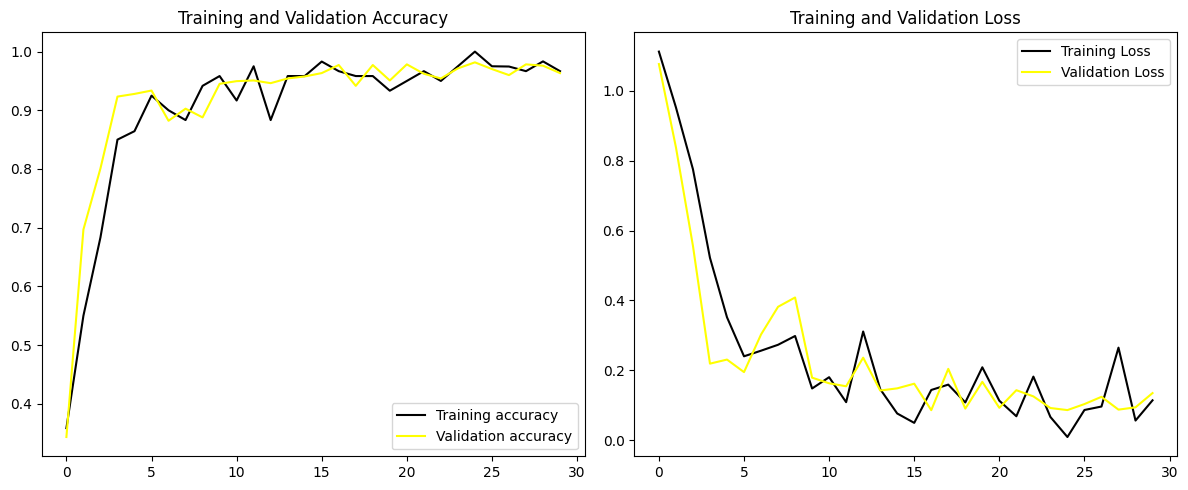

In [ ]:
# Extraemos y almacenamos las métricas de rendimiento (precisión y pérdida)
# obtenidas durante el entrenamiento del modelo.

# 'acc' define la precisión del modelo en el conjunto de entrenamiento para cada época.
acc = history.history['accuracy']

# 'val_acc' define la precisión del modelo en el conjunto de validación para cada época.
val_acc = history.history['val_accuracy']

# 'loss' define la pérdida del modelo en el conjunto de entrenamiento para cada época.
loss = history.history['loss']

 # 'val_loss' define la pérdida del modelo en el conjunto de validación para cada época
val_loss = history.history['val_loss']

# Creamos una secuencia de números (épocas) que se utilizara como el eje x en
# los siguietnes gráficos.

epochs = range(len(acc))

# Graficamos los resultados obtenidos.

plt.figure(figsize=(12, 5))

# Grafico de 'Accuracy' (precision).

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'black', label='Training accuracy')
plt.plot(epochs, val_acc, 'yellow', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Grafico de 'Loss' (perdida).

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'black', label='Training Loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Mostramos los gráficos.

plt.tight_layout()
plt.show()

Los graficos mostrados, muestran que la distancia entre los datos de entrenamiento y la validación es bastante cercana pero no exacta, lo que nos garantiza que no se produzca un sobreajuste.

# Resultados <a name="resultados"></a>




Saving 3.jpg to 3 (9).jpg
1/1 [==============================] - 0s 39ms/step
3 (9).jpg
This image is rock


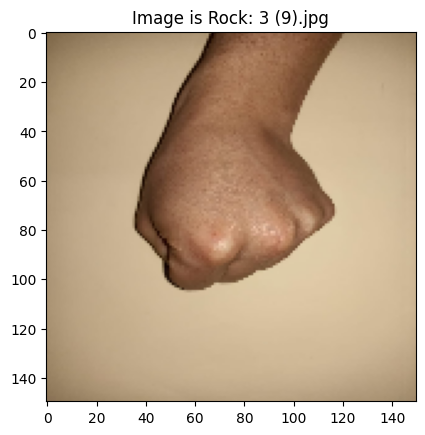

In [ ]:
# Cargamos alguna imagen para realizar predicciones con el modelo previamente entrenado.

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn

  # Redimensionamos la imagen al tamaño que espera el modelo.

  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # Utilizamos el modelo para predecir la clase de imagen guardada.

  classes = arquitectura.predict(images, batch_size=4)

  print(fn)
  if classes[0,0]!=0:
    print('This image is paper')
    plt.title("Image is paper: " + fn)
  elif classes[0,1]!=0:
    print('This image is rock')
    plt.title("Image is Rock: " + fn )
  else:
    print('This image is scissors')
    plt.title("Image is Scissors: " + fn ,)

Saving cOHWfHkyo8sqWnpW.png to cOHWfHkyo8sqWnpW.png
1/1 [==============================] - 0s 37ms/step
hyQDSSjNFHX7Wirc.png
This image is scissors


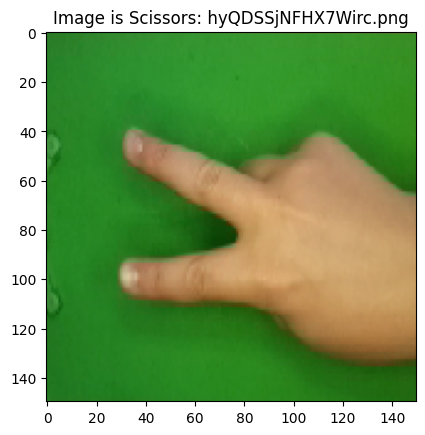

In [ ]:
# Probamos con otra imagen.

uploaded = files.upload()

path = fn
img = image.load_img(path, target_size =(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = arquitectura.predict(images, batch_size=4)

print(fn)
if classes[0,0]!=0:
  print('This image is paper')
  plt.title("Image is paper: " + fn)
elif classes[0,1]!=0:
  print('This image is rock')
  plt.title("Image is Rock: " + fn )
else:
  print('This image is scissors')
  plt.title("Image is Scissors: " + fn ,)

# Conclusiones <a name="conclsuiones"></a>


Se logro el objetivo principal del proyecto el cual era analizar un conjunto de imagenes del famoso juego piedra, papel o tijeras mediante el uso de las CNN para realizar la tarea de clasificar dichas imagenes mientras que al mismo tiempo se adquirio un mayor conocimiento acerca de la forma que deberia tomar la arquitectura de una CNN para la realiacion de esta tarea particular, tambien se logro aprender a explorar archivos de la platafroma Kaggle desde Google Colab sin la necesidad de descargar localmente el dataset.

Como futuro proyecto se planea utilzar otra arquitectura para realizar la misma tarea y poder comparar la eficiencia de ambas arquitecturas.

# Referencias <a name="referencias"></a>



[1] https://www.lisdatasolutions.com/es/blog/deep-learning-clasificando-imagenes-con-redes-neuronales/

[2] https://nafizshahriar.medium.com/what-is-convolutional-neural-network-cnn-deep-learning-b3921bdd82d5

[3] Dataset. https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

[4] https://keepcoding.io/blog/tipos-capas-red-neuronal-convolucional/

[5] https://datascientest.com/es/convolutional-neural-network-es

[6] https://www.diegocalvo.es/funcion-de-activacion-redes-neuronales/